In [5]:
import torchvision.datasets as datasets 
import torchvision
from torch.utils.data import DataLoader
import numpy as np
import os 
import matplotlib.pyplot as plt

In [4]:
current_dir = os.path.dirname(os.path.abspath(''))
data_dir = os.path.join(current_dir, 'final', 'data')
print(data_dir)
if not os.path.exists(data_dir): 
    os.makedirs(data_dir)

/home/hgiang/2022_coding/neural-network-1/final/data


tensor(7)


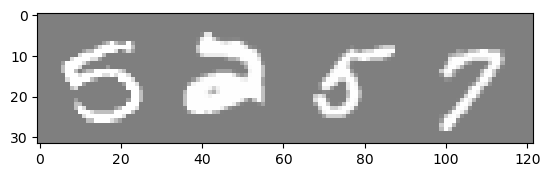

    5     2     5     7


In [16]:
import torchvision.transforms as transforms

batch_size=4

transform = transforms.ToTensor()

# Get MNIST data, normalize, divide by level 
mnist_train = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
trainloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2)

testset = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels[3])

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{labels[j]:5}' for j in range(batch_size)))

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.209
[1,  4000] loss: 0.244
[1,  6000] loss: 0.169
[1,  8000] loss: 0.133
[1, 10000] loss: 0.112
[1, 12000] loss: 0.102
[1, 14000] loss: 0.088
[2,  2000] loss: 0.076
[2,  4000] loss: 0.068
[2,  6000] loss: 0.072
[2,  8000] loss: 0.077
[2, 10000] loss: 0.059
[2, 12000] loss: 0.056
[2, 14000] loss: 0.058
Finished Training


In [19]:
current_dir = os.path.dirname(os.path.abspath(''))
model_path = os.path.join(current_dir, 'final', 'mnist_net.pth')
torch.save(net.state_dict(), model_path)

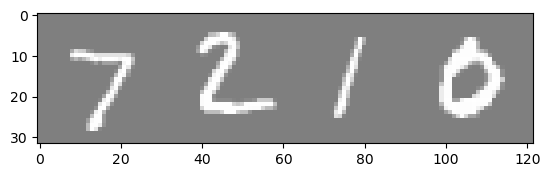

GroundTruth:      7     2     1     0


In [21]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels[j]:5}' for j in range(4)))

In [22]:
net = Net()
net.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [23]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{predicted[j]:5}' for j in range(4)))

Predicted:      7     2     1     0


In [24]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %
